In [4]:
import scipy
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

src_dir = os.path.join(os.getcwd(), "../src")
sys.path.append(src_dir)
from course_project.dynamics import *

## Implement Impedance controller
Controller is of the form $F = - k_p (x_0 - x) - k_d \dot{x}$. Think of $x_0 = 0$ as being nominal
resting length of the leg

### Experiment 1: Impedance Controller

J 0.039125858


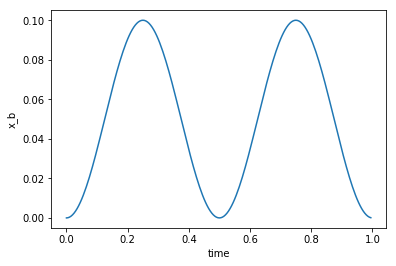

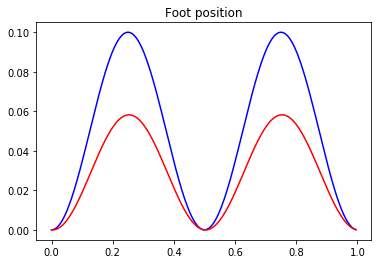

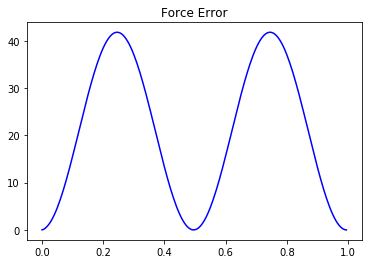

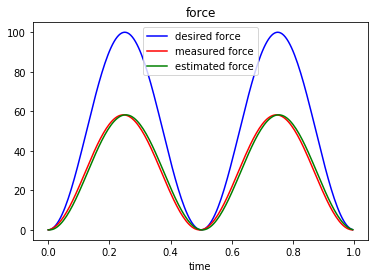

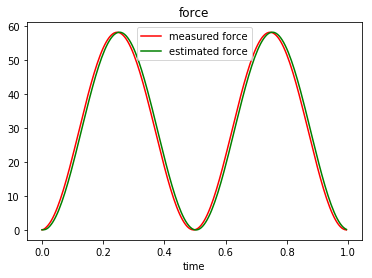

In [8]:
controller_params = dict()
controller_params['k_p'] = 1000
damping_ratio = 0.0
controller_params['k_d'] = 2 * damping_ratio * np.sqrt(controller_params['k_p'])


k_p = controller_params['k_p']

params = make_default_params()
# params['k_s'] = 30
# params['k_s'] = 100

print "J", params['J']
# params['J'] = params['J']/10.0

# print params['k_s']
# params['k_s'] = 10000 # increase stiffness by factor of 10, markedly improves the tracking
sys, [A,B,C,D] = impedance_ss_system(params, controller_params)

# simulate
freq_hz = 2
dt = 0.01/freq_hz
t_vec = np.arange(0,2.0/freq_hz, dt)
omega_vec = 2 * t_vec * np.pi * freq_hz
amplitude = 0.1  
x_b = amplitude/2.0 * (1 - np.cos(omega_vec))
x_b_dot = amplitude/2.0 * np.sin(omega_vec)

force_desired = controller_params['k_p']*x_b + controller_params['k_d'] * x_b_dot

# plot the body position (externally specified)
plt.plot(t_vec, x_b)
plt.xlabel('time')
plt.ylabel('x_b')
plt.show()

# plt.plot(t_vec, force_desired, 'b')
# plt.title("force")
# plt.xlabel('time')
# plt.show()



# simulate the system
t_out, yout, xout = scipy.signal.lsim(sys, x_b, t_vec)

C = -np.array([controller_params['k_p'], controller_params['k_d']])
C = C.reshape([2,1])

force_est = np.dot(xout, C)


# plot of measured vs sensed position

plt.plot(t_vec, x_b, 'b', label='measured position')
plt.plot(t_vec, -xout[:, 0], 'r', label='estimated position')
plt.title("Foot position")
plt.show()

force_error_from_encoder = (x_b + xout[:, 0])*k_p
plt.plot(t_vec, force_error_from_encoder, 'b')
plt.title('Force Error')
plt.show()

# Force Plots
plt.plot(t_vec, force_desired, 'b', label='desired force')
plt.title("force")
plt.xlabel('time')
plt.plot(t_out, yout, 'r', label='measured force')
plt.plot(t_out, force_est, 'g', label='estimated force')
plt.legend()
plt.show()


# Estimated and measured forces
plt.title("force")
plt.xlabel('time')
plt.plot(t_out, yout, 'r', label='measured force')
plt.plot(t_out, force_est, 'g', label='estimated force')
plt.legend()
plt.show()

# Problem is estimated foot position, not torque tracking
